### 케라스로 만드는 회귀 예제
- boston_housing 데이터셋 : 404개의 훈련샘플 & 102개의 검증샘플, y는 각 지역의 중간 주택가격(천달러) 

In [2]:
import numpy as np
import matplotlib.pyplot as plt 

from tensorflow.keras.datasets import boston_housing 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

In [4]:
# 데이터 적재 
(X_train, y_train), (X_valid, y_valid) = boston_housing.load_data()

print(X_train.shape, y_train.shape, X_valid.shape, y_valid.shape)

(404, 13) (404,) (102, 13) (102,)


In [10]:
print(X_train[:5])
print('--------------------------------')
print(y_train[:5])

[[1.23247e+00 0.00000e+00 8.14000e+00 0.00000e+00 5.38000e-01 6.14200e+00
  9.17000e+01 3.97690e+00 4.00000e+00 3.07000e+02 2.10000e+01 3.96900e+02
  1.87200e+01]
 [2.17700e-02 8.25000e+01 2.03000e+00 0.00000e+00 4.15000e-01 7.61000e+00
  1.57000e+01 6.27000e+00 2.00000e+00 3.48000e+02 1.47000e+01 3.95380e+02
  3.11000e+00]
 [4.89822e+00 0.00000e+00 1.81000e+01 0.00000e+00 6.31000e-01 4.97000e+00
  1.00000e+02 1.33250e+00 2.40000e+01 6.66000e+02 2.02000e+01 3.75520e+02
  3.26000e+00]
 [3.96100e-02 0.00000e+00 5.19000e+00 0.00000e+00 5.15000e-01 6.03700e+00
  3.45000e+01 5.98530e+00 5.00000e+00 2.24000e+02 2.02000e+01 3.96900e+02
  8.01000e+00]
 [3.69311e+00 0.00000e+00 1.81000e+01 0.00000e+00 7.13000e-01 6.37600e+00
  8.84000e+01 2.56710e+00 2.40000e+01 6.66000e+02 2.02000e+01 3.91430e+02
  1.46500e+01]]
--------------------------------
[15.2 42.3 50.  21.1 17.7]


In [13]:
# 신경망 
model = Sequential()
model.add(Dense(32, input_dim=13, activation='relu'))
model.add(BatchNormalization())  ## 이전 층의 출력값에 대한 배치 정규화 
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(1, activation='linear'))   ## 회귀 문제이므로 출력함수는 linear 

model.summary()

/Users/yb_choi/Downloads/yes/envs/tf_metal/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 32)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,185 (4.63 KB)

 Trainable params: 1,089 (4.25 KB)

 Non-trainable params: 96 (384.00 B)

In [14]:
# 컴파일 : 회귀문제 이므로 손실함수는 MSE로 지정하고, accuracy는 지정할 수 없다.  
model.compile(optimizer = 'adam', loss='mean_squared_error')

In [15]:
# train the model
history = model.fit(X_train, y_train,
                    epochs=32,
                    batch_size=8,
                    verbose=1,
                    validation_data=(X_valid, y_valid))

Epoch 1/32


2025-06-15 22:37:23.803622: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 546.0164 - val_loss: 561.5610
Epoch 2/32
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 537.8644 - val_loss: 600.1180
Epoch 3/32
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 568.4722 - val_loss: 562.7791
Epoch 4/32
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 540.9493 - val_loss: 548.3229
Epoch 5/32
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 501.2865 - val_loss: 509.4662
Epoch 6/32
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 487.5071 - val_loss: 451.7716
Epoch 7/32
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 442.5406 - val_loss: 417.3762
Epoch 8/32
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 417.0435 - val_loss: 359.3419
Epoch 9/32
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 357.6354 - val_loss: 329.3533
Epoch 10/32
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 334.8685 - val_loss: 257.6331
Epoch 11/32
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 286.7448 - val_loss: 212.3848
Epoch 12/32
51/51 ━━━━━━━━━━━━

In [17]:
# 43번째 지역의 중간 주택가격 예측하고, 실제와 비교해보기 
# 43번째 샘플값을 가져와, 1x13 형태로 reshape 하고 모델이 예측하도록 함 
print('에측값 = ', 
      model.predict(np.reshape(X_valid[42], [1,13]))
      )

print('실제값 = ', y_valid[42])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
에측값 =  [[18.817095]]
실제값 =  14.1


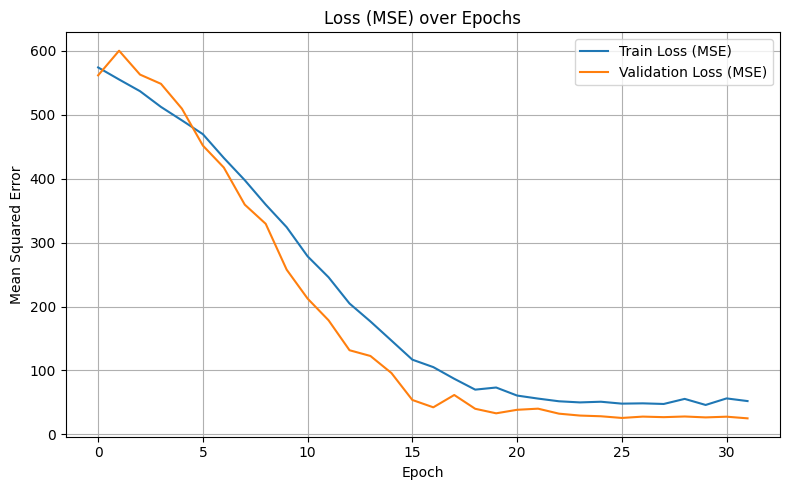

In [21]:
# 손실(Loss) 시각화
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss (MSE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MSE)')
plt.title('Loss (MSE) over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()